<a href="https://colab.research.google.com/github/HSGanesh/1CD22AI023/blob/main/cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


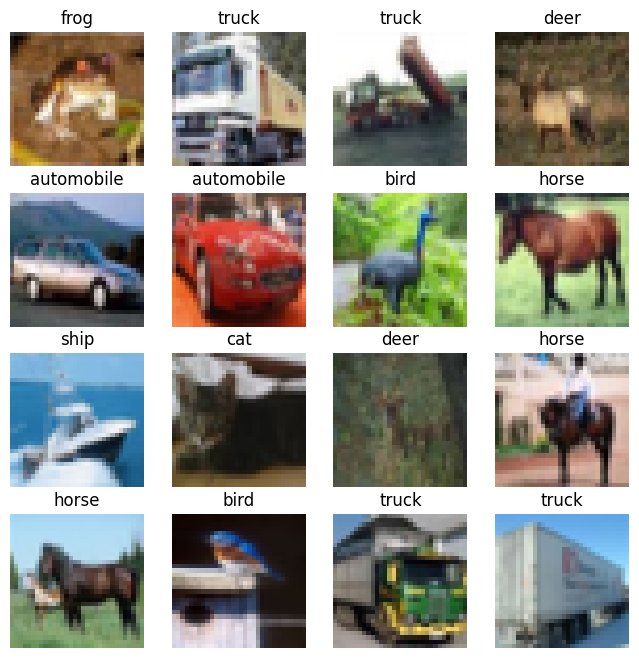

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the CIFAR-10 dataset directly from Keras
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the class names for plotting and prediction
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 16 images from the dataset
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*2, nrows*2)

for i in range(16):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  plt.imshow(x_train[i])
  plt.title(class_names[y_train[i][0]]) # CIFAR-10 labels are nested arrays
plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout

model = Sequential([
    # Input shape is (32, 32, 3) for CIFAR-10 images
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    # Flatten the results to feed into a DNN
    Flatten(),
    # 64 neuron hidden layer
    Dense(64, activation='relu'),
    Dropout(0.2),
    # 10 output neurons for 10 classes
    Dense(10, activation='softmax')
])

model.summary()

# Compile the model with the new loss function
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the preloaded data
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    verbose=2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 - 85s - 55ms/step - accuracy: 0.4176 - loss: 1.6053 - val_accuracy: 0.5421 - val_loss: 1.2852
Epoch 2/10
1563/1563 - 82s - 52ms/step - accuracy: 0.5812 - loss: 1.1937 - val_accuracy: 0.5993 - val_loss: 1.1174
Epoch 3/10
1563/1563 - 78s - 50ms/step - accuracy: 0.6409 - loss: 1.0328 - val_accuracy: 0.6328 - val_loss: 1.0836
Epoch 4/10
1563/1563 - 76s - 48ms/step - accuracy: 0.6743 - loss: 0.9414 - val_accuracy: 0.6885 - val_loss: 0.9362
Epoch 5/10
1563/1563 - 80s - 51ms/step - accuracy: 0.6971 - loss: 0.8898 - val_accuracy: 0.6533 - val_loss: 1.0688
Epoch 6/10
1563/1563 - 72s - 46ms/step - accuracy: 0.7137 - loss: 0.8541 - val_accuracy: 0.6738 - val_loss: 0.9721
Epoch 7/10
1563/1563 - 71s - 46ms/step - accuracy: 0.7239 - loss: 0.8314 - val_accuracy: 0.6906 - val_loss: 1.0100
Epoch 8/10
1563/1563 - 81s - 52ms/step - accuracy: 0.7296 - loss: 0.8157 - val_accuracy: 0.6598 - val_loss: 1.0889
Epoch 9/10
1563/1563 - 72s - 46ms/step - accuracy: 0.7301 - loss: 0.8200 - val_a

313/313 - 5s - 17ms/step - accuracy: 0.6664 - loss: 1.0296

Test accuracy: 0.6664000153541565


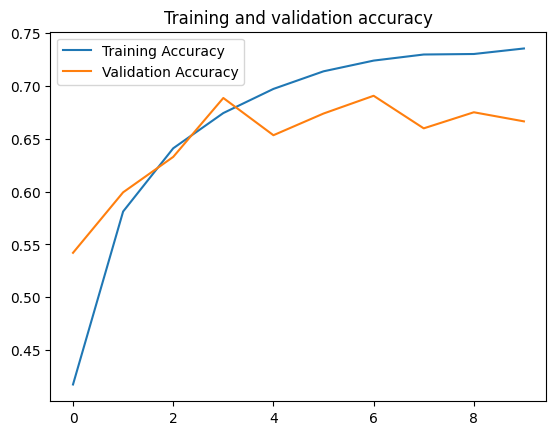

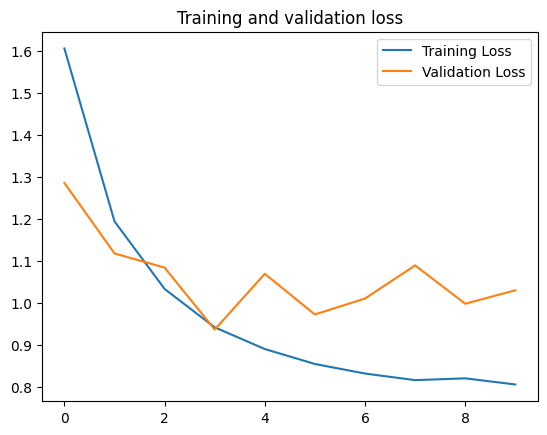

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step

True Class: horse
Predicted Class: horse


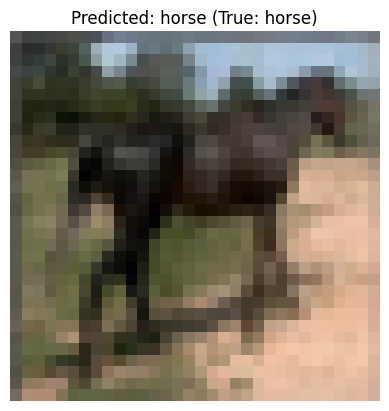

In [6]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

idx = random.randint(0, len(x_test) - 1)
img = x_test[idx]
true_label = y_test[idx][0]

img_batch = np.expand_dims(img, axis=0)

predictions = model.predict(img_batch)
predicted_class = np.argmax(predictions[0])

print(f"\nTrue Class: {class_names[true_label]}")
print(f"Predicted Class: {class_names[predicted_class]}")
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class]} (True: {class_names[true_label]})")
plt.axis('off')
plt.show()

In [9]:
from google.colab import drive
drive.mount('/content/drive')
MODEL_PATH = "/content/drive/MyDrive/cifar10_cnn.keras"
model.save(MODEL_PATH)
print("Model saved successfully")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved successfully


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
The image is predicted to be a: horse


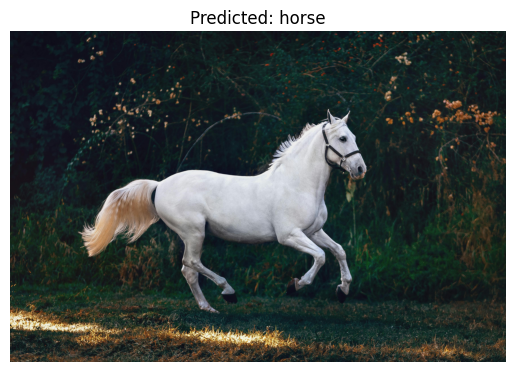

In [10]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

my_image_path = "/horse_image.jpg"
img = load_img(my_image_path, target_size=(32, 32))

img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

print(f'The image is predicted to be a: {predicted_class}')
plt.imshow(load_img(my_image_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()